 ## Unsupervised learning
● Supervisedlearning finds pa!erns for a prediction task <br> 
● E.g. classify tumors as benign or cancerous (labels) <br> 
● Unsupervised learning finds pa!erns in data <br> 
● ... but withouta specific prediction task in mind<br> 

In [100]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from scipy.cluster.hierarchy import fcluster
from sklearn.manifold import TSNE

import pandas as pd
import matplotlib.pyplot as plt

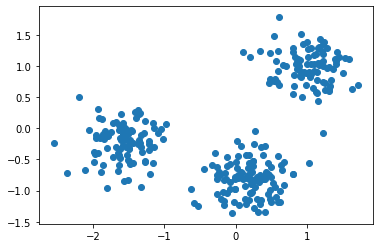

In [7]:
xs=points[:,0]
ys=points[:,1]
plt.scatter(xs,ys)
plt.show()

In [8]:


# Create a KMeans instance with 3 clusters: model
model = KMeans(n_clusters=3)

# Fit model to points
model.fit(points)

# Determine the cluster labels of new_points: labels
labels = model.predict(new_points)

# Print cluster labels of new_points
print(labels)


[0 2 1 0 2 0 2 2 2 1 0 2 2 1 1 2 1 1 2 2 1 2 0 2 0 1 2 1 1 0 0 2 2 2 1 0 2
 2 0 2 1 0 0 1 0 2 1 1 2 2 2 2 1 1 0 0 1 1 1 0 0 2 2 2 0 2 1 2 0 1 0 0 0 2
 0 1 1 0 2 1 0 1 0 2 1 2 1 0 2 2 2 0 2 2 0 1 1 1 1 0 2 0 1 1 0 0 2 0 1 1 0
 1 1 1 2 2 2 2 1 1 2 0 2 1 2 0 1 2 1 1 2 1 2 1 0 2 0 0 2 1 0 2 0 0 1 2 2 0
 1 0 1 2 0 1 1 0 1 2 2 1 2 1 1 2 2 0 2 2 1 0 1 0 0 2 0 2 2 0 0 1 0 0 0 1 2
 2 0 1 0 1 1 2 2 2 0 2 2 2 1 1 0 2 0 0 0 1 2 2 2 2 2 2 1 1 2 1 1 1 1 2 1 1
 2 2 0 1 0 0 1 0 1 0 1 2 2 1 2 2 2 1 0 0 1 2 2 1 2 1 1 2 1 1 0 1 0 0 0 2 1
 1 1 0 2 0 1 0 1 1 2 0 0 0 1 2 2 2 0 2 1 1 2 0 0 1 0 0 1 0 2 0 1 1 1 1 2 1
 1 2 2 0]


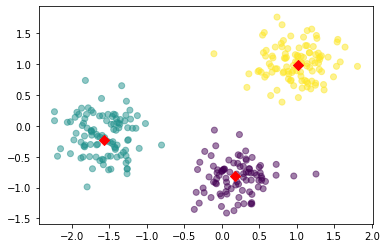

In [12]:


# Assign the columns of new_points: xs and ys
xs = new_points[:,0]
ys = new_points[:,1]

# Make a scatter plot of xs and ys, using labels to define the colors
plt.scatter(xs,ys, c=labels, alpha=0.5)

# Assign the cluster centers: centroids
centroids = model.cluster_centers_

# Assign the columns of centroids: centroids_x, centroids_y
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

# Make a scatter plot of centroids_x and centroids_y
plt.scatter(centroids_x,centroids_y,marker='D', s=50, color ='r')
plt.show()


## Evaluating a Cluster


In [15]:
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
samples = df[list(range(7))].values

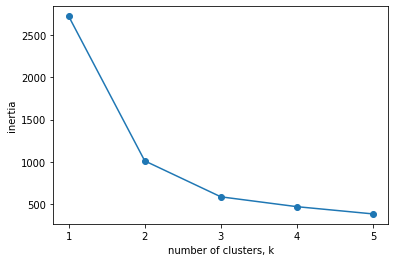

The inertia decreases very slowly from 3 clusters to 4,
so it looks like 3 clusters would be a good choice for this data.


In [22]:
ks = range(1, 6)
inertias = []

for k in ks:
    # Create a KMeans instance with k clusters: model
    model = KMeans(n_clusters=k)
    
    # Fit model to samples
    model.fit(samples)
    
    # Append the inertia to the list of inertias
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()
print('The inertia decreases very slowly from 3 clusters to 4,\
\nso it looks like 3 clusters would be a good choice for this data.')

In [31]:
df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/seeds.csv', header=None)
samples = df[list(range(7))].values
species = list(df[0])
varieties = list(df[7].map({1: 'Kama wheat', 2: 'Rosa wheat', 3: 'Canadian wheat'}))
# Create a KMeans model with 3 clusters: model
model = KMeans(n_clusters=3)

# Use fit_predict to fit model and obtain cluster labels: labels
labels = model.fit_predict(samples)

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)
print('The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.\
\nBut depending on the type of data you are working with, the clustering may not always be this good.')

varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
0                       0           1          60
1                       2          60          10
2                      68           9           0
The cross-tabulation shows that the 3 varieties of grain separate really well into 3 clusters.
But depending on the type of data you are working with, the clustering may not always be this good.


### built the pipeline to cluster the fish by their measurements.

In [32]:
# Perform the necessary imports
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Create scaler: scaler
scaler = StandardScaler()

# Create KMeans instance: kmeans
kmeans = KMeans(n_clusters=4)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,kmeans)


In [35]:

df = pd.read_csv('https://s3.amazonaws.com/assets.datacamp.com/production/course_2234/datasets/fish.csv', header=None)
species = list(df[0])
samples = df[list(range(1, len(df.columns)))].values

# Fit the pipeline to samples
pipeline.fit(samples)

# Calculate the cluster labels: labels
labels = pipeline.predict(samples)

# Create a DataFrame with labels and species as columns: df
df = pd.DataFrame({'labels': labels, 'species': species})


# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['species'])

# Display ct
print(ct)


species  Bream  Pike  Roach  Smelt
labels                            
0            1     0     19      1
1           33     0      1      0
2            0    17      0      0
3            0     0      0     13


In [62]:
df=pd.read_csv('company-stock-movements-2010-2015-incl.csv')
df.head()
print(df.columns)
companies = list(df['Unnamed: 0'])
movements = df.drop(columns='Unnamed: 0', axis=1).values
movements

Index(['Unnamed: 0', '2010-01-04', '2010-01-05', '2010-01-06', '2010-01-07',
       '2010-01-08', '2010-01-11', '2010-01-12', '2010-01-13', '2010-01-14',
       ...
       '2013-10-16', '2013-10-17', '2013-10-18', '2013-10-21', '2013-10-22',
       '2013-10-23', '2013-10-24', '2013-10-25', '2013-10-28', '2013-10-29'],
      dtype='object', length=964)


array([[ 5.8000000e-01, -2.2000500e-01, -3.4099980e+00, ...,
        -5.3599620e+00,  8.4001900e-01, -1.9589981e+01],
       [-6.4000200e-01, -6.5000000e-01, -2.1000100e-01, ...,
        -4.0001000e-02, -4.0000200e-01,  6.6000000e-01],
       [-2.3500060e+00,  1.2600090e+00, -2.3500060e+00, ...,
         4.7900090e+00, -1.7600090e+00,  3.7400210e+00],
       ...,
       [ 4.3000100e-01,  2.2999600e-01,  5.7000000e-01, ...,
        -2.6000200e-01,  4.0000100e-01,  4.8000300e-01],
       [ 9.0000000e-02,  1.0000000e-02, -8.0000000e-02, ...,
        -3.0000000e-02,  2.0000000e-02, -3.0000000e-02],
       [ 1.5999900e-01,  1.0001000e-02,  0.0000000e+00, ...,
        -6.0001000e-02,  2.5999800e-01,  9.9998000e-02]])

In [63]:
from sklearn.preprocessing import Normalizer

# Create a normalizer: normalizer
normalizer = Normalizer()

# Create a KMeans model with 10 clusters: kmeans
kmeans = KMeans(n_clusters=10)

# Make a pipeline chaining normalizer and kmeans: pipeline
pipeline = make_pipeline(normalizer,kmeans)

# Fit pipeline to the daily price movements
pipeline.fit(movements)

Pipeline(memory=None,
         steps=[('normalizer', Normalizer(copy=True, norm='l2')),
                ('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=10, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0))],
         verbose=False)

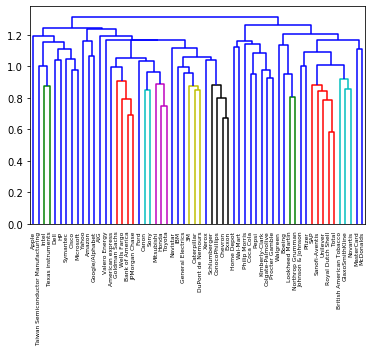

    labels                           companies
58       0                               Xerox
16       0                   General Electrics
0        1                               Apple
43       1                                 SAP
17       1                     Google/Alphabet
2        1                              Amazon
52       2                            Unilever
37       2                            Novartis
39       2                              Pfizer
42       2                   Royal Dutch Shell
46       2                      Sanofi-Aventis
19       2                     GlaxoSmithKline
6        2            British American Tobacco
49       2                               Total
34       3                          Mitsubishi
15       3                                Ford
7        3                               Canon
45       3                                Sony
21       3                               Honda
22       3                                  HP
48       3   

In [76]:
# Predict the cluster labels: labels
labels = pipeline.predict(movements)

# Create a DataFrame aligning labels and companies: df
df = pd.DataFrame({'labels': labels, 'companies': companies})


# Normalize the movements: normalized_movements
normalized_movements = normalize(movements)

# Calculate the linkage: mergings
mergings = linkage(normalized_movements, method='complete')

# Plot the dendrogram
dendrogram(mergings,
           labels=companies,
           leaf_rotation=90,
           leaf_font_size=6,
)
plt.show()


# Display df sorted by cluster label
print(df.sort_values('labels'))




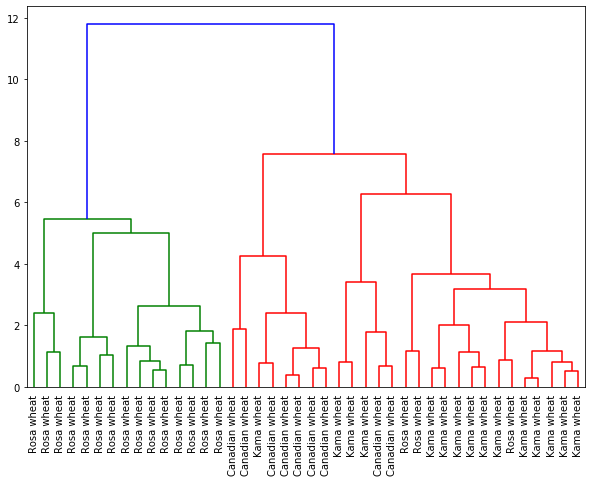

In [91]:
df = pd.read_csv('Grains/seeds.csv', header = None)
df.iloc[:, 7].replace({1: 'Kama wheat', 2:'Rosa wheat', 3: 'Canadian wheat'}, inplace = True)
df = df.sample(42)
samples = df.iloc[:, 0: 7].values
varieties = df.iloc[:, 7].values

# Perform the necessary imports
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Calculate the linkage: mergings
mergings = linkage(samples,method='complete')

fig = plt.figure(figsize=(10,7))
# Plot the dendrogram, using varieties as labels
dendrogram(mergings,
           labels=varieties,
           leaf_rotation=90,
           leaf_font_size=10,
)
plt.show()


In [84]:
import numpy as np
df= pd.read_csv('eurovision-2016.csv')
pt = pd.pivot_table(df, index = 'From country', columns = 'To country', values = 'Jury Points', aggfunc = 'sum')
pt.replace({np.nan: 0}, inplace = True)
samples = pt.values
country_names = pt.index.values
print(pt.head())
print(df.head())

To country    Armenia  Australia  Austria  Azerbaijan  Belgium  Bulgaria  \
From country                                                               
Albania           0.0       12.0      0.0         0.0      0.0       4.0   
Armenia           0.0        5.0      0.0         0.0      4.0       7.0   
Australia         0.0        0.0      0.0         0.0     12.0       8.0   
Austria           2.0       12.0      0.0         0.0      5.0       0.0   
Azerbaijan        0.0        7.0      0.0         0.0      0.0       8.0   

To country    Croatia  Cyprus  Czech Republic  France       ...        \
From country                                                ...         
Albania           0.0     0.0             0.0    10.0       ...         
Armenia           0.0     6.0             1.0    12.0       ...         
Australia         1.0     0.0             0.0     6.0       ...         
Austria           6.0     0.0             4.0     7.0       ...         
Azerbaijan        0.0     0.0

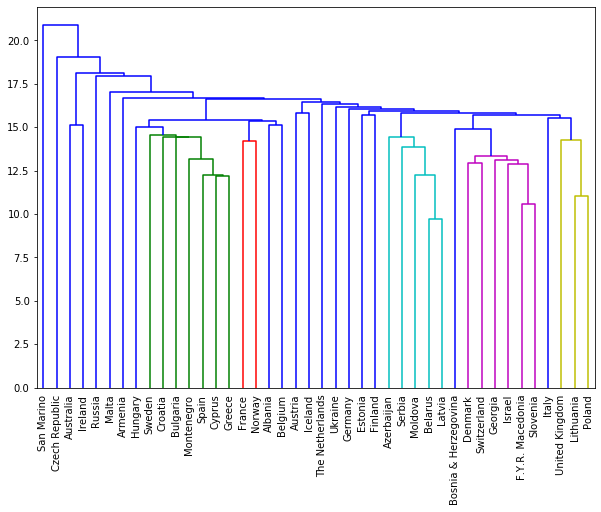

In [89]:
fig = plt.figure(figsize=(10,7))

# Calculate the linkage: mergings
mergings = linkage(samples, method='single')

# Plot the dendrogram
dendrogram(mergings,
labels=country_names,
leaf_rotation=90,leaf_font_size=10)
plt.show()

In [96]:

df = pd.read_csv('Grains/seeds.csv', header = None)
variety_numbers = df.iloc[:, 7].values
df.iloc[:, 7].replace({1: 'Kama wheat', 2:'Rosa wheat', 3: 'Canadian wheat'}, inplace = True)
samples = df.iloc[:, 0: 7].values
varieties = df.iloc[:, 7].values
df.head()

,0,1,2,3,4,5,6,7
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,Kama wheat
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,Kama wheat
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,Kama wheat
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,Kama wheat
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,Kama wheat


## Extracting the cluster labels

In [98]:
# Calculate the linkage: mergings
mergings = linkage(samples, method = 'complete')

# Use fcluster to extract labels: labels
labels = fcluster(mergings, 6,criterion='distance')

# Create a DataFrame with labels and varieties as columns: df
df = pd.DataFrame({'labels': labels, 'varieties': varieties})

# Create crosstab: ct
ct = pd.crosstab(df['labels'], df['varieties'])

# Display ct
print(ct)


varieties  Canadian wheat  Kama wheat  Rosa wheat
labels                                           
1                       0           0          47
2                       0          52          23
3                      13           1           0
4                      57          17           0


## t-SNE visualization of grain dataset

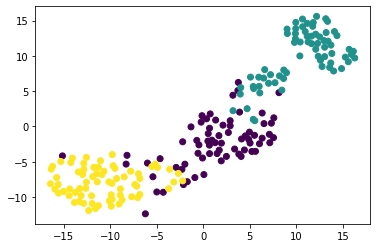

In [101]:
# Import TSNE


# Create a TSNE instance: model
model =  TSNE(learning_rate=200) 

# Apply fit_transform to samples: tsne_features
tsne_features =  model.fit_transform(samples) 

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1st feature: ys
ys = tsne_features[:,1]

# Scatter plot, coloring by variety_numbers
plt.scatter(xs,ys,c=variety_numbers)
plt.show()


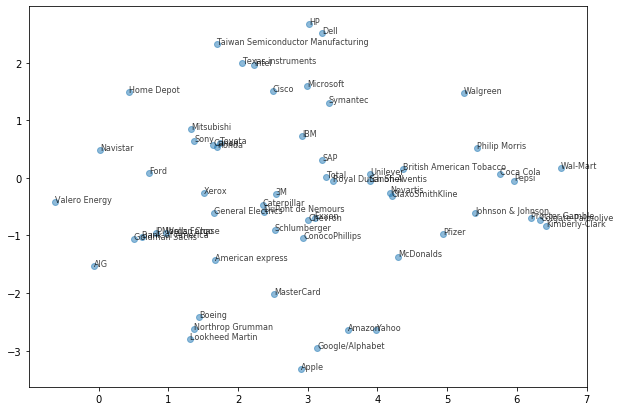

In [104]:
fig = plt.figure(figsize=(10,7))
# Import TSNE
from sklearn.manifold import TSNE

# Create a TSNE instance: model
model = TSNE(learning_rate=50)

# Apply fit_transform to normalized_movements: tsne_features
tsne_features = model.fit_transform(normalized_movements)

# Select the 0th feature: xs
xs = tsne_features[:,0]

# Select the 1th feature: ys
ys = tsne_features[:,1]

# Scatter plot
plt.scatter(xs,ys,alpha=0.5)

# Annotate the points
for x, y, company in zip(xs, ys, companies):
    plt.annotate(company, (x, y), fontsize=8, alpha=0.75)
plt.show()


## Principal Component Analysis

### Correlated data in nature

In [105]:
df = pd.read_csv('Grains/seeds-width-vs-length.csv', header = None)
grains = df.values

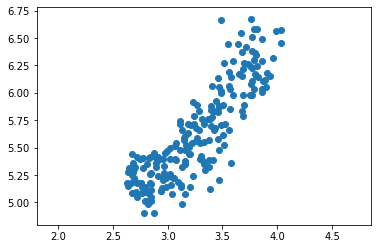

0.8604149377143466
, the width and length of the grain samples are highly correlated.


In [108]:
# Perform the necessary imports
from scipy.stats import pearsonr


# Assign the 0th column of grains: width
width = grains[:,0]

# Assign the 1st column of grains: length
length = grains[:,1]

# Scatter plot width vs length
plt.scatter(width, length)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation
correlation, pvalue = pearsonr(width, length)

# Display the correlation
print(correlation)
print(', the width and length of the grain samples are highly correlated.')

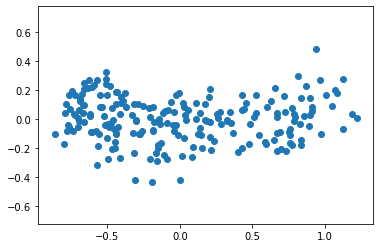

7.24247051220317e-17


In [109]:
# Import PCA
from sklearn.decomposition import PCA

# Create PCA instance: model
model = PCA()

# Apply the fit_transform method of model to grains: pca_features
pca_features = model.fit_transform(grains)

# Assign 0th column of pca_features: xs
xs = pca_features[:,0]

# Assign 1st column of pca_features: ys
ys = pca_features[:,1]

# Scatter plot xs vs ys
plt.scatter(xs, ys)
plt.axis('equal')
plt.show()

# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(xs, ys)

# Display the correlation
print(correlation)

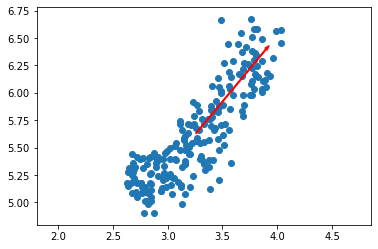

In [110]:
# Make a scatter plot of the untransformed points
plt.scatter(grains[:,0], grains[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_

# Get the first principal component: first_pc
first_pc = model.components_[0,:]

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

In [118]:
fish = pd.read_csv('fish.csv', header = None, index_col = 0)
samples = fish.values
species = fish.index.values

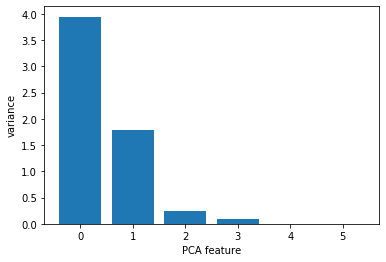

It looks like PCA features 0 and 1 have significant variance.
 Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.


In [119]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler,pca)

# Fit the pipeline to 'samples'
pipeline.fit(samples)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

print('It looks like PCA features 0 and 1 have significant variance.')
print(' Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.')

In [121]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
scaled_samples = scaler.fit_transform(samples)
pca.fit(scaled_samples)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_samples)

# Print the shape of pca_features
print(pca_features.shape)
print('the dimensionality reduces from 6 to 2.')

(85, 2)
the dimensionality reduces from 6 to 2.


In [122]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']


# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer() 

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# Get the words: words
words = tfidf.get_feature_names()

# Print words
print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
['cats', 'chase', 'dogs', 'meow', 'say', 'woof']


### Clustering Wikipedia part I

#### set up pipeline to cluster the articles.

In [123]:
# Perform the necessary imports
from sklearn.decomposition import TruncatedSVD
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline

# Create a TruncatedSVD instance: svd
svd = TruncatedSVD(n_components=50)

# Create a KMeans instance: kmeans
kmeans = KMeans(n_clusters=6)

# Create a pipeline: pipeline
pipeline = make_pipeline(svd,kmeans)


####  the cluster labels

In [127]:
df = pd.read_csv('Wikipedia articles/wikipedia-vectors.csv', index_col = 0)

articles = df.T.values
titles = df.columns.values

In [128]:
# Import pandas
import pandas as pd

# Fit the pipeline to articles
pipeline.fit(articles)

# Calculate the cluster labels: labels
labels = pipeline.predict(articles)

# Create a DataFrame aligning labels and titles: df
df = pd.DataFrame({'label': labels, 'article': titles})

# Display df sorted by cluster label
print(df.sort_values('label'))


    label                                        article
40      0                                    Tonsillitis
47      0                                          Fever
59      1                                    Adam Levine
57      1                          Red Hot Chili Peppers
56      1                                       Skrillex
55      1                                  Black Sabbath
54      1                                 Arctic Monkeys
53      1                                   Stevie Nicks
52      1                                     The Wanted
51      1                                     Nate Ruess
50      1                                   Chad Kroeger
58      1                                         Sepsis
18      2  2010 United Nations Climate Change Conference
17      2  Greenhouse gas emissions by the United States
16      2                                        350.org
19      2  2007 United Nations Climate Change Conference
14      2                      

In [132]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF instance: model
model = NMF(n_components=6)

# Fit the model to articles
model.fit(articles)

# Transform the articles: nmf_features
nmf_features = model.transform(articles)

# Print the NMF features
#print(nmf_features)


In [134]:
# Create a pandas DataFrame: df
df = pd.DataFrame(nmf_features, index=titles)

# Print the row for 'Anne Hathaway'
print(df.loc['Anne Hathaway'])

# Print the row for 'Denzel Washington'
print(df.loc['Denzel Washington'])

print('\n Notice that for both actors, the NMF feature 3 has by far the highest value.\
\nThis means that both articles are reconstructed using mainly the 3rd NMF component. ')

0    0.003846
1    0.000000
2    0.000000
3    0.575700
4    0.000000
5    0.000000
Name: Anne Hathaway, dtype: float64
0    0.000000
1    0.005601
2    0.000000
3    0.422372
4    0.000000
5    0.000000
Name: Denzel Washington, dtype: float64

 Notice that for both actors, the NMF feature 3 has by far the highest value.
This means that both articles are reconstructed using mainly the 3rd NMF component. 


In [136]:
df = pd.read_csv('Wikipedia articles/wikipedia-vocabulary-utf8.txt', header = None)
words = df.values

In [137]:
# Import pandas
import pandas as pd

# Create a DataFrame: components_df
components_df = pd.DataFrame(model.components_, columns=words)

# Print the shape of the DataFrame
print(components_df.shape)

# Select row 3: component
component = components_df.iloc[3,:]

# Print result of nlargest
print(component.nlargest())


(6, 13125)
(film,)       0.627888
(award,)      0.253136
(starred,)    0.245288
(role,)       0.211455
(actress,)    0.186401
Name: 3, dtype: float64


In [139]:
df = pd.read_csv('lcd-digits.csv')
samples = df.values

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 0.
 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 1. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 1. 1. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0.]]


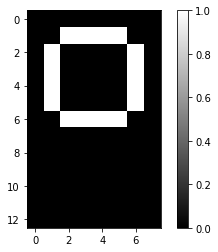

In [140]:
# Import pyplot
from matplotlib import pyplot as plt

# Select the 0th row: digit
digit = samples[0,:]

# Print digit
print(digit)

# Reshape digit to a 13x8 array: bitmap
bitmap = digit.reshape(13,8)

# Print bitmap
print(bitmap)

# Use plt.imshow to display bitmap
plt.imshow(bitmap, cmap='gray', interpolation='nearest')
plt.colorbar()
plt.show()


In [141]:
def show_as_image(sample):
    bitmap = sample.reshape((13, 8))
    plt.figure()
    plt.imshow(bitmap, cmap='gray', interpolation='nearest')
    plt.colorbar()
    plt.show()

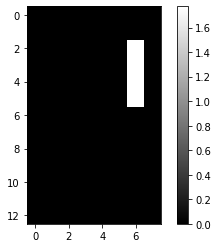

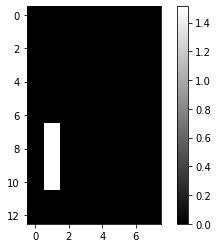

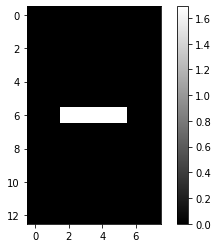

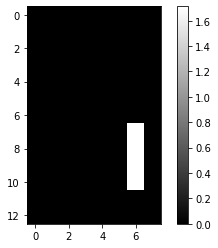

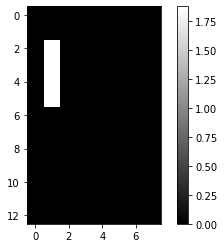

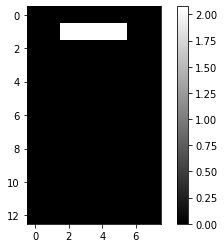

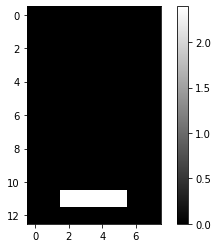

[0.56389272 0.         0.59151401 0.         0.53290007 0.48133215
 0.        ]


In [142]:
# Import NMF
from sklearn.decomposition import NMF

# Create an NMF model: model
model = NMF(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)

# Assign the 0th row of features: digit_features
digit_features = features[0,:]

# Print digit_features
print(digit_features)

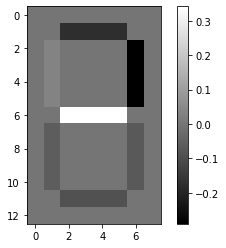

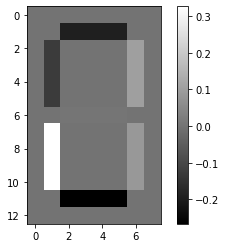

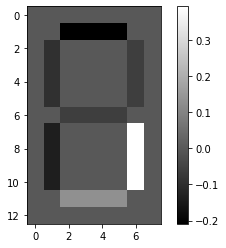

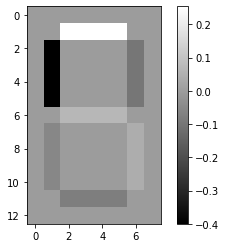

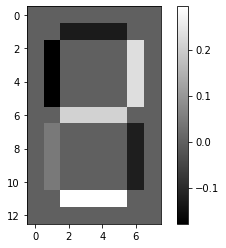

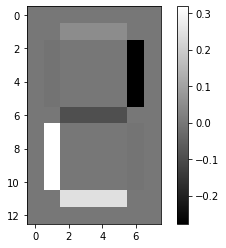

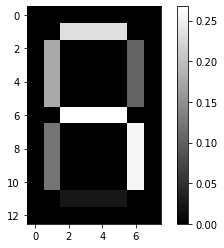

In [143]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA instance: model
model = PCA(n_components=7)

# Apply fit_transform to samples: features
features = model.fit_transform(samples)

# Call show_as_image on each component
for component in model.components_:
    show_as_image(component)
    
    

In [144]:


# Normalize the NMF features: norm_features
norm_features = normalize(nmf_features)

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index = titles)


# Select the row corresponding to 'Cristiano Ronaldo': article
article = df.loc[ 'Cristiano Ronaldo']

# Compute the dot products: similarities
similarities = df.dot(article)

# Display those with the largest cosine similarity
print(similarities.nlargest())

Cristiano Ronaldo                1.000000
Franck Ribéry                    0.999972
Radamel Falcao                   0.999942
Zlatan Ibrahimović               0.999942
France national football team    0.999923
dtype: float64


In [149]:
df1 = pd.read_csv('Musical artists/scrobbler-small-sample.csv', header = 0)
df1.head()

,user_offset,artist_offset,playcount
0,1,79,58
1,1,84,80
2,1,86,317
3,1,89,64
4,1,96,159


In [151]:

df2 = pd.read_csv('Musical artists/artists.csv', header = None)
df2['id'] = df2.index
df2.columns = ['name', 'id']
df2.head()

,name,id
0,Massive Attack,0
1,Sublime,1
2,Beastie Boys,2
3,Neil Young,3
4,Dead Kennedys,4


In [152]:

df = pd.merge(df1, df2, how = 'left', left_on = 'artist_offset', right_on = 'id')
df.head()

,user_offset,artist_offset,playcount,name,id
0,1,79,58,Misfits,79
1,1,84,80,The Beach Boys,84
2,1,86,317,Bob Marley & the Wailers,86
3,1,89,64,Mirah,89
4,1,96,159,Rilo Kiley,96


In [154]:
pt = pd.pivot_table(data = df, index = 'name', columns = 'user_offset', values = 'playcount', aggfunc = 'sum')
pt.replace(np.nan, 0, inplace = True)
artists = pt.values
artist_names = pt.index.values

In [156]:
# Perform the necessary imports
from sklearn.decomposition import NMF
from sklearn.preprocessing import Normalizer, MaxAbsScaler
from sklearn.pipeline import make_pipeline

# Create a MaxAbsScaler: scaler
scaler = MaxAbsScaler()

# Create an NMF model: nmf
nmf = NMF(n_components=20)

# Create a Normalizer: normalizer
normalizer = Normalizer()

# Create a pipeline: pipeline
pipeline = make_pipeline(scaler,nmf,normalizer)

# Apply fit_transform to artists: norm_features
norm_features = pipeline.fit_transform(artists)


In [157]:

# Create a DataFrame: df
df = pd.DataFrame(norm_features, index=artist_names)

# Select row of 'Bruce Springsteen': artist
artist = df.loc['Bruce Springsteen']

# Compute cosine similarities: similarities
similarities = df.dot(artist)

# Display those with highest cosine similarity
print(similarities.nlargest())


Bruce Springsteen    1.000000
Neil Young           0.957515
Leonard Cohen        0.914231
Van Morrison         0.879353
Bob Dylan            0.860653
dtype: float64
